# 데이터 준비

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!cp /gdrive/MyDrive/tmp/glaucoma.zip ./

In [3]:
!unzip glaucoma.zip

Archive:  glaucoma.zip
   creating: glaucoma/test/
   creating: glaucoma/test/advanced/
  inflating: glaucoma/test/advanced/421.png  
  inflating: glaucoma/test/advanced/422.png  
  inflating: glaucoma/test/advanced/423.png  
  inflating: glaucoma/test/advanced/424.png  
  inflating: glaucoma/test/advanced/425.png  
  inflating: glaucoma/test/advanced/426.png  
  inflating: glaucoma/test/advanced/427.png  
  inflating: glaucoma/test/advanced/428.png  
  inflating: glaucoma/test/advanced/429.png  
  inflating: glaucoma/test/advanced/430.png  
  inflating: glaucoma/test/advanced/431.png  
  inflating: glaucoma/test/advanced/432.png  
  inflating: glaucoma/test/advanced/433.png  
  inflating: glaucoma/test/advanced/434.png  
  inflating: glaucoma/test/advanced/435.png  
  inflating: glaucoma/test/advanced/436.png  
  inflating: glaucoma/test/advanced/437.png  
  inflating: glaucoma/test/advanced/438.png  
  inflating: glaucoma/test/advanced/439.png  
  inflating: glaucoma/test/advanced/44

In [4]:
!mkdir glaucoma
!mv train glaucoma/
!mv valid glaucoma/
!mv test glaucoma/

mkdir: cannot create directory ‘glaucoma’: File exists
mv: cannot stat 'train': No such file or directory
mv: cannot stat 'valid': No such file or directory
mv: cannot stat 'test': No such file or directory


# 전이 학습 시도

31801344/31790344 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten (Flatten)           (None, 68992)             0         
                                                                 
 dense (Dense)               (None, 256)               17662208  
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 25,432,572
Trainable params: 17,663,491
Non

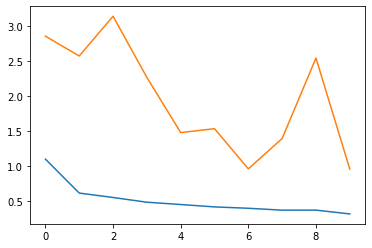

3/3 [==============================] - 1s 270ms/step - loss: 1.5074 - acc: 0.5325
loss= 1.5073597431182861
acc= 0.5324675440788269


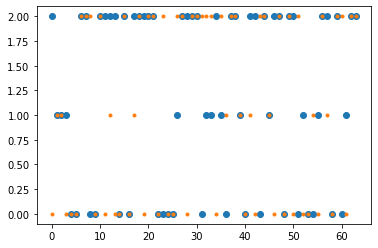

label category index = 2.0
predicted category index = 0
predicted category name = advanced


In [5]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


정확도가 낮음.

# 전이학습 인데 conv도 학습

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_1 (Flatten)         (None, 68992)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               17662208  
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 25,432,572
Trainable params: 25,364,485
Non-trainable params: 68,087
_____________________________________

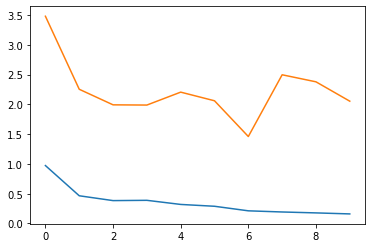

3/3 [==============================] - 1s 141ms/step - loss: 1.8829 - acc: 0.5390
loss= 1.8829166889190674
acc= 0.5389610528945923


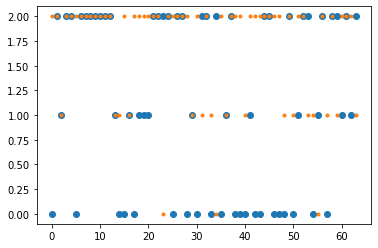

label category index = 0.0
predicted category index = 2
predicted category name = normal


In [6]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = True   # <----------------------- CHANGE

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


효과가 없없음 그래서 vanilla CNN 시도

# vanila CNN으로

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

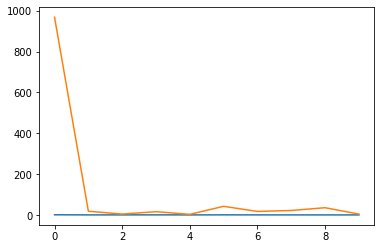

3/3 [==============================] - 1s 439ms/step - loss: 5.2210 - acc: 0.2987
loss= 5.2209906578063965
acc= 0.29870128631591797


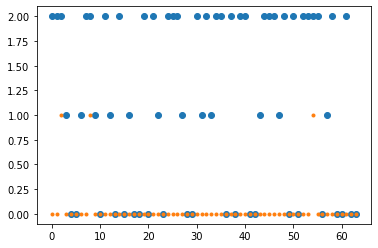

label category index = 2.0
predicted category index = 0
predicted category name = advanced


In [7]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))   # <-----------------------
# conv_layers.trainable = True   # <----------------------- OUT

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))   # <----------------------- CHANGE
model.add(Conv2D(64, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


전부 0으로 시도가 됨
런닝레이트가 큰것같아서 즐여주자 

# learning rate 작게

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

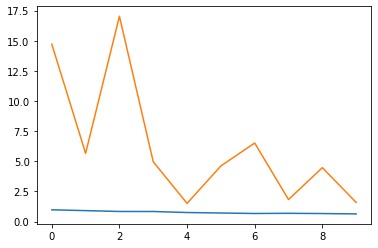

3/3 [==============================] - 1s 144ms/step - loss: 2.2971 - acc: 0.3766
loss= 2.2970516681671143
acc= 0.37662336230278015


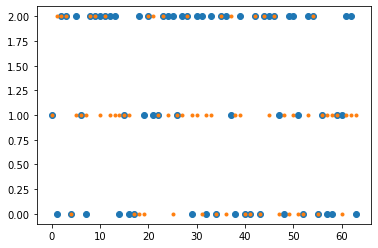

label category index = 1.0
predicted category index = 1
predicted category name = early


In [8]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001)   # <----------------------- ADD
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])   # <----------------------- CHANGE
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


In [9]:
train_data_generator.batch_size=1000
batch_x, batch_y = train_data_generator.next()
print(batch_x.shape)
print(batch_y.shape)

(1000, 224, 224, 3)
(1000,)


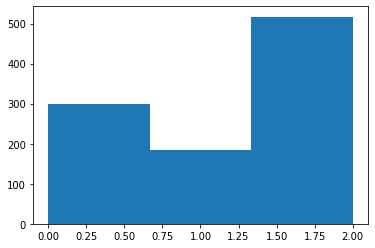

In [10]:
plt.hist(batch_y, bins=3)
plt.show()

0 :advanced 1:normal 2:early

# optimizer를 Adam으로

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

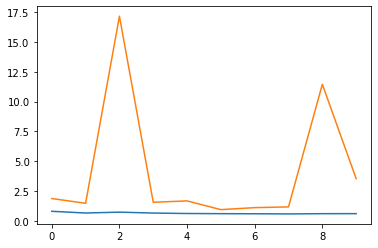

3/3 [==============================] - 1s 145ms/step - loss: 4.2199 - acc: 0.2922
loss= 4.219855308532715
acc= 0.2922077775001526


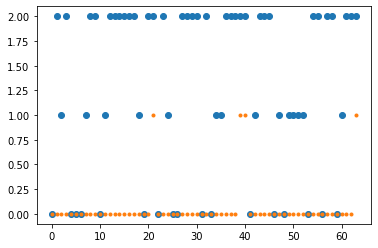

label category index = 0.0
predicted category index = 0
predicted category name = advanced


In [11]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)   # <----------------------- CHANGE
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])# <--------- CHANGE
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# epoch 더 많이 학습

Epoch 1/40
20/20 [==============================] - 18s 862ms/step - loss: 0.5810 - acc: 0.7602 - val_loss: 3.3524 - val_acc: 0.4437
Epoch 2/40
20/20 [==============================] - 17s 839ms/step - loss: 0.5681 - acc: 0.7715 - val_loss: 3.1316 - val_acc: 0.5000
Epoch 3/40
20/20 [==============================] - 17s 843ms/step - loss: 0.5469 - acc: 0.7764 - val_loss: 1.2935 - val_acc: 0.6438
Epoch 4/40
20/20 [==============================] - 17s 846ms/step - loss: 0.5325 - acc: 0.7667 - val_loss: 0.8833 - val_acc: 0.6750
Epoch 5/40
20/20 [==============================] - 17s 839ms/step - loss: 0.5408 - acc: 0.7707 - val_loss: 1.6007 - val_acc: 0.4875
Epoch 6/40
20/20 [==============================] - 17s 850ms/step - loss: 0.5398 - acc: 0.7610 - val_loss: 0.9605 - val_acc: 0.6250
Epoch 7/40
20/20 [==============================] - 17s 878ms/step - loss: 0.5319 - acc: 0.7780 - val_loss: 1.4283 - val_acc: 0.5063
Epoch 8/40
20/20 [==============================] - 17s 845ms/step - 

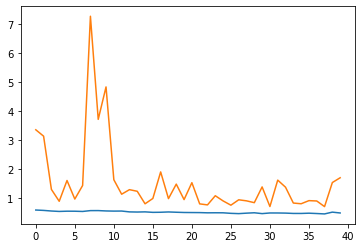

3/3 [==============================] - 1s 141ms/step - loss: 1.7576 - acc: 0.3961
loss= 1.7575762271881104
acc= 0.3961038887500763


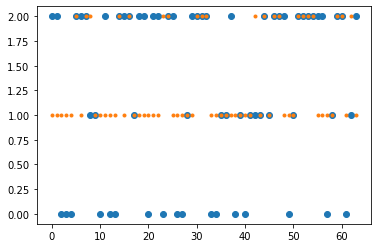

label category index = 2.0
predicted category index = 1
predicted category name = early


In [12]:
history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=40   # <----------------------- CHANGE
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

역시나 한군데 모여있는것처럼 보임
모델이 너무 커서 그런건가? 그래서 conv레이어들을 작게 조정해 보자

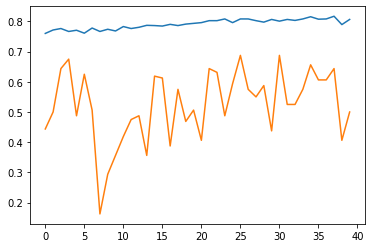

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

# Conv 레이어들 작게 조정

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_40 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 conv2d_41 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 conv2d_43 (Conv2D)          (None, 112, 112, 32)      9248      
                                                      

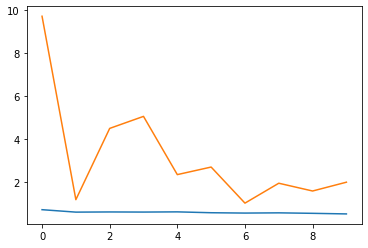

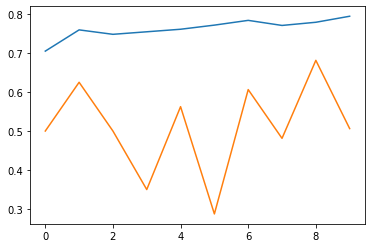

3/3 [==============================] - 1s 207ms/step - loss: 1.9410 - acc: 0.5260
loss= 1.940969467163086
acc= 0.5259740352630615


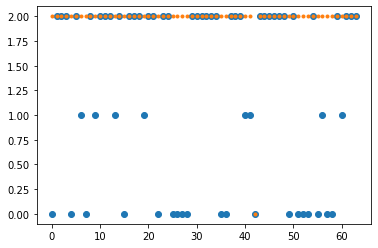

label category index = 0.0
predicted category index = 2
predicted category name = normal


In [14]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(32, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(32, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(32, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(32, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(64, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(64, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(128, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(128, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(128, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(128, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


결과가 그닥 좋아지지 않음

# Conv 더 작게

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_55 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 conv2d_56 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 conv2d_58 (Conv2D)          (None, 112, 112, 32)      9248      
                                                      

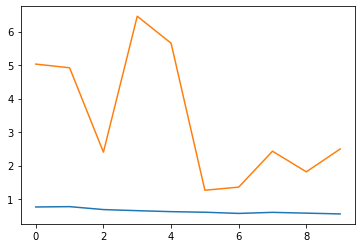

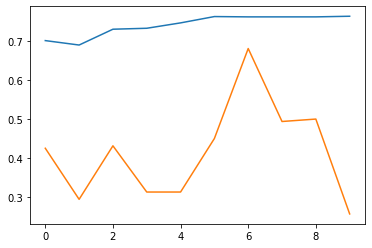

3/3 [==============================] - 1s 150ms/step - loss: 2.5426 - acc: 0.3312
loss= 2.542647361755371
acc= 0.3311688303947449


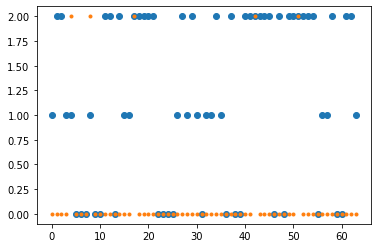

label category index = 1.0
predicted category index = 0
predicted category name = advanced


In [15]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(32, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(32, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(64, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(64, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(64, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(64, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(64, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(Conv2D(64, (3,3), padding='same'))   # <----------------------- CHANGE
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 사용하면 안될 preprocess를 제거하고 scaling

(32, 224, 224, 3)
(32,)


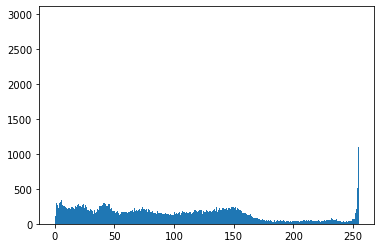

In [16]:
train_data_generator.batch_size=32
batch_x, batch_y = train_data_generator.next()
print(batch_x.shape)
print(batch_y.shape)

plt.hist(batch_x[0].flatten(), bins=1000)
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_70 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 conv2d_71 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 conv2d_73 (Conv2D)          (None, 112, 112, 32)      9248      
                                                      

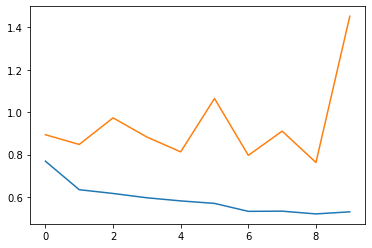

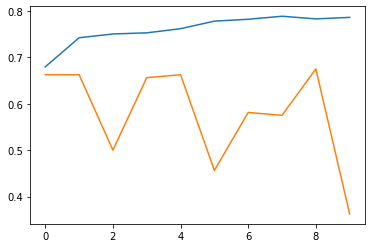

3/3 [==============================] - 1s 154ms/step - loss: 1.7798 - acc: 0.3182
loss= 1.779776692390442
acc= 0.3181818127632141


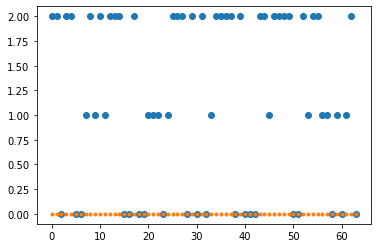

label category index = 2.0
predicted category index = 0
predicted category name = advanced


In [17]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1/255.,   # <-----------------------
      # preprocessing_function=preprocessor   # <----------------------- OUT
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.,   # <-----------------------
      # preprocessing_function=preprocessor   # <----------------------- OUT
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255.,   # <-----------------------
      # preprocessing_function=preprocessor   # <----------------------- OUT
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


(32, 224, 224, 3)
(32,)


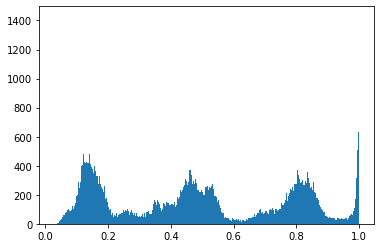

In [18]:
train_data_generator.batch_size=32
batch_x, batch_y = train_data_generator.next()
print(batch_x.shape)
print(batch_y.shape)

plt.hist(batch_x[0].flatten(), bins=1000)
plt.show()

# Learning Rate 더 줄이고, epoch 수 많이

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_85 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 conv2d_86 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 conv2d_88 (Conv2D)          (None, 112, 112, 32)      9248      
                                                      

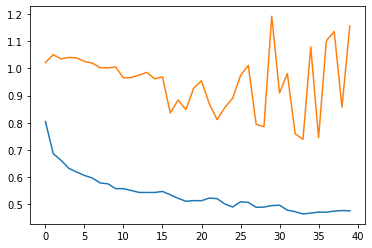

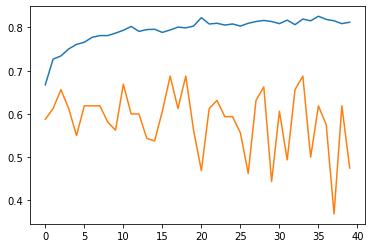

3/3 [==============================] - 1s 140ms/step - loss: 1.2716 - acc: 0.4481
loss= 1.2716307640075684
acc= 0.44805195927619934


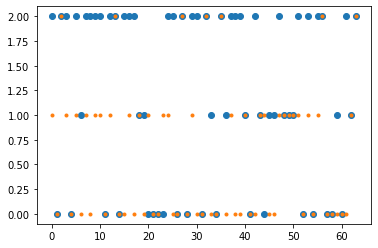

label category index = 2.0
predicted category index = 1
predicted category name = early


In [19]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1)  # <----------------------- CHANGE
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1/255.,
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255., 
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=40  # <----------------------- CHANGE
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 데이터 증강 제거

GPU를 거의 사용하지 못한다

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_100 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 conv2d_101 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_102 (Conv2D)         (None, 112, 112, 32)      9248      
                                                                 
 conv2d_103 (Conv2D)         (None, 112, 112, 32)      9248      
                                                      

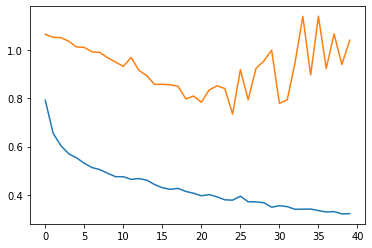

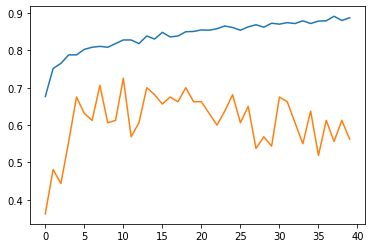

3/3 [==============================] - 1s 154ms/step - loss: 1.2700 - acc: 0.4740
loss= 1.269951343536377
acc= 0.4740259647369385


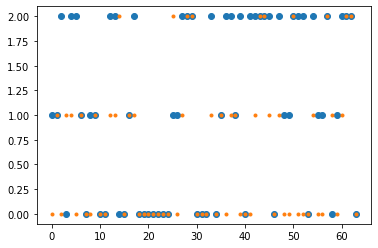

label category index = 1.0
predicted category index = 0
predicted category name = advanced


In [20]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1)  
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      # rotation_range=10,      # <----------------------- OUT
      # width_shift_range=0.1,  # <----------------------- OUT
      # height_shift_range=0.1, # <----------------------- OUT
      # horizontal_flip=True,   # <----------------------- OUT
      # vertical_flip=False,    # <----------------------- OUT
      rescale=1/255.,
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255., 
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=40
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 1000 에폭

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_114 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 conv2d_115 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 conv2d_116 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_117 (Conv2D)         (None, 112, 112, 32)      9248      
                                                                 
 conv2d_118 (Conv2D)         (None, 112, 112, 32)      9248      
                                                     

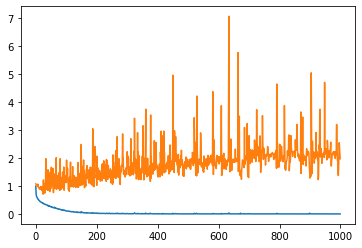

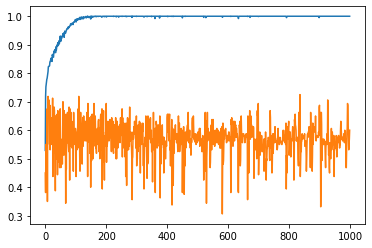

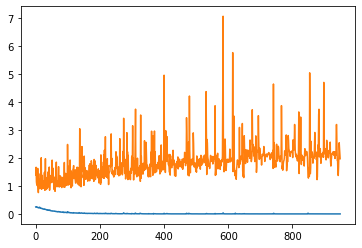

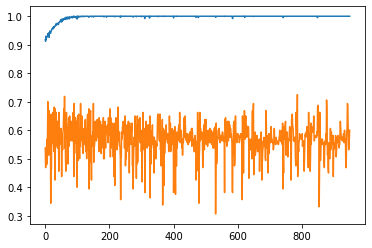

3/3 [==============================] - 1s 159ms/step - loss: 2.4500 - acc: 0.5909
loss= 2.4499776363372803
acc= 0.5909090638160706


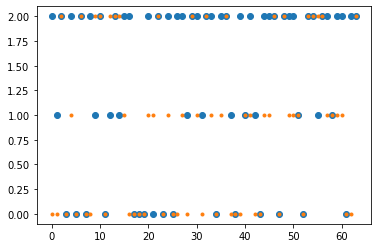

label category index = 2.0
predicted category index = 0
predicted category name = advanced


In [21]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1) 
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      # rotation_range=10,
      # width_shift_range=0.1,  
      # height_shift_range=0.1,  
      # horizontal_flip=True,  
      # vertical_flip=False,  
      rescale=1/255.,
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255., 
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=1000    # <----------------------- CHANGE
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.plot(history.history['loss'][50:])
plt.plot(history.history['val_loss'][50:])
plt.show()

plt.plot(history.history['acc'][50:])
plt.plot(history.history['val_acc'][50:])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])
